# Reading JSON and Plotting with Haskell

Author: Kat Chuang [@katychuang](http://twitter.com/katychuang) on Twitter

## Objective

The goal of this exercise is to parse JSON from the Facebook Graph Api using the Aeson library. 

I collected data from my most recent posts and previously saved json output from a [python version of this code](http://www.github.com/katychuang/ipython-notebooks/blob/master/facebook_posting_activity.ipynb) and saved it into a `file.json` 

---

### Import data 
First import the modules we'll need for this exercise, and define the data record type to map the json fields to variables.

In [1]:
{-# LANGUAGE DeriveGeneric #-}

import Data.Aeson
import Data.Aeson.Types
import Data.Time.Clock (UTCTime)
import qualified Data.ByteString.Lazy as B
import Options.Generic

Define the record type for reading JSON. The fields correspond to JSON fields.

In [2]:
data Post = Post
  { created_time :: UTCTime
  , id           :: String
  , message      :: Maybe String
  , story        :: Maybe String
  } deriving (Show, Generic)

instance FromJSON Post
instance ToJSON Post

input <- B.readFile "_+posts2017.json"

We now have the `input` with the data read in from the JSON file and can proceed with parsing the values.


### Parse JSON Data with Aeson

**1. eitherDecode**

Here's one way to parse the json, using `eitherDecode`, which captures the error message. The left side provides the error message, whereas the right contains the value. 

The types we're working with:

```haskell
putStrLn :: String -> IO ()
print :: Show a => a -> IO ()
mapM_ :: (Monad m, Foldable t) => (a -> m b) -> t a -> m ()
Data.Text.take :: Int -> Text -> Text
```

The snippet below saves the first timestampe into the variable `recent`

In [3]:
let myJSON = eitherDecode input :: Either String [Post]


recent <- case myJSON of 
  Left err -> putStrLn err
  Right value -> mapM_ print $ take 1 [ created_time x | x <- value ]

2017-03-19 22:23:36 UTC

**2. decode**

We can be further concise with the code since we can assume that the JSON formatting is predictable. We can assume this because I saved the data in the [python version of this project, in part 1](https://github.com/katychuang/ipython-notebooks/blob/master/facebook_posting_activity.ipynb) - instead use `decode` while assigning the data to a variable. It auto parses the list of JSON dictionaries into a list of Haskell data record types. 

In [4]:
let (Just allData) = decode input :: Maybe [Post]

Now that we have `theData` with the type `[Post]`, which is a list of `Post` elements, we can easily work with displaying the information in a number of ways.

To demonstrate how the data structure looks like, let's print out the created time field from the first item in the list. 

In [5]:
-- show most recent timestamp
print $ created_time $ head allData

2017-03-19 22:23:36 UTC

### Working with Time

Now we are at a position to worry about how timestamps are interpreted by Haskell.

To get an idea of activity per day, we need the timestamps. We can filter the `allData` to get a list of timestamps. You can follow the structure below to grab all the timestamps in a list, and let's try both map and list comprehension approaches.

**1. Using map**

In [6]:
-- show all the timestamps
print $ show (length allData) ++ " items in the file. Showing them all with map "
print (map created_time allData) --same as: print $ map (\post -> created_time post) y

"46 items in the file. Showing them all with map "

[2017-03-19 22:23:36 UTC,2017-03-19 21:45:38 UTC,2017-03-19 21:24:07 UTC,2017-03-19 17:26:43 UTC,2017-03-17 19:57:17 UTC,2017-03-16 05:57:48 UTC,2017-03-15 19:06:26 UTC,2017-03-12 19:49:29 UTC,2017-03-12 05:35:42 UTC,2017-03-11 03:48:44 UTC,2017-03-11 02:05:14 UTC,2017-03-10 19:10:38 UTC,2017-03-10 06:24:15 UTC,2017-03-10 06:09:01 UTC,2017-03-09 20:45:35 UTC,2017-03-09 20:19:24 UTC,2017-03-05 14:02:33 UTC,2017-03-05 12:31:59 UTC,2017-03-04 20:30:23 UTC,2017-03-02 09:45:44 UTC,2017-03-01 05:24:02 UTC,2017-02-28 20:22:52 UTC,2017-02-22 03:01:11 UTC,2017-02-17 15:18:44 UTC,2017-02-11 17:00:00 UTC,2017-02-10 02:00:00 UTC,2017-02-09 20:32:37 UTC,2017-02-08 22:55:17 UTC,2017-02-05 22:47:10 UTC,2017-02-05 15:59:21 UTC,2017-02-04 12:43:57 UTC,2017-02-02 14:15:57 UTC,2017-02-02 13:49:41 UTC,2017-01-30 05:57:13 UTC,2017-01-30 05:40:25 UTC,2017-01-29 22:48:25 UTC,2017-01-27 17:00:00 UTC,2017-01-25 20:41:15 UTC,2017-01-25 19:16:11 UTC,2017-01-25 03:00:00 UTC,2017-01-24 22:47:41 UTC,2017-01-18 02:2

** 2. Using List Comprehension**

We can import the `utctDay` function from `Data.Time.Clock` to format the timestamps.

In [7]:
import Data.Time.Clock (utctDay)
:t utctDay

utctDay :: UTCTime -> Day

In [8]:
print $ show (length allData) ++ " items in the file. Showing them with utctDay and list comprehension "
print [ utctDay (created_time x) | x <- allData ]

"46 items in the file. Showing them with utctDay and list comprehension "

[2017-03-19,2017-03-19,2017-03-19,2017-03-19,2017-03-17,2017-03-16,2017-03-15,2017-03-12,2017-03-12,2017-03-11,2017-03-11,2017-03-10,2017-03-10,2017-03-10,2017-03-09,2017-03-09,2017-03-05,2017-03-05,2017-03-04,2017-03-02,2017-03-01,2017-02-28,2017-02-22,2017-02-17,2017-02-11,2017-02-10,2017-02-09,2017-02-08,2017-02-05,2017-02-05,2017-02-04,2017-02-02,2017-02-02,2017-01-30,2017-01-30,2017-01-29,2017-01-27,2017-01-25,2017-01-25,2017-01-25,2017-01-24,2017-01-18,2017-01-17,2017-01-15,2017-01-07,2017-01-05]

We can also look at the time diff from today as well if we were interested in relative time.

In [9]:
import Data.Time.Clock (diffUTCTime, UTCTime)
:t diffUTCTime


import Data.Time.Calendar (fromGregorian)
let marchEnd = fromGregorian 2017 03 31
:t marchEnd

diffUTCTime :: UTCTime -> UTCTime -> NominalDiffTime

marchEnd :: Day

**diffDays**

In [10]:
import Data.Time.Calendar (diffDays)
print [ diffDays marchEnd (utctDay $ created_time x) | x <- allData ]

[12,12,12,12,14,15,16,19,19,20,20,21,21,21,22,22,26,26,27,29,30,31,37,42,48,49,50,51,54,54,55,57,57,60,60,61,63,65,65,65,66,72,73,75,83,85]

In [11]:
daysAgo x = timestamp ++ show (delta x) ++ " days ago"
    where 
        timestamp = show (created_time x) ++ " = " 
        postDate p = utctDay $ created_time p
        delta x = diffDays marchEnd (postDate x)
    
mapM_ print $ take 5 [ daysAgo x | x <- allData ]

"2017-03-19 22:23:36 UTC = 12 days ago"
"2017-03-19 21:45:38 UTC = 12 days ago"
"2017-03-19 21:24:07 UTC = 12 days ago"
"2017-03-19 17:26:43 UTC = 12 days ago"
"2017-03-17 19:57:17 UTC = 14 days ago"

**NominalDiffTime**

In [12]:
let marchEndUTC = read "2017-03-31 23:59:59 UTC" :: UTCTime
print [ marchEndUTC `diffUTCTime` created_time x | x <- allData ]

[1042583s,1044861s,1046152s,1060396s,1224162s,1360931s,1400013s,1656630s,1707857s,1800675s,1806885s,1831761s,1877744s,1878658s,1912464s,1914035s,2282246s,2287680s,2345376s,2556855s,2658957s,2691427s,3272328s,3660075s,4172399s,4312799s,4332442s,4410282s,4669969s,4694438s,4792562s,4959842s,4961418s,5248966s,5249974s,5274694s,5468399s,5627924s,5633028s,5691599s,5706738s,6298624s,6389999s,6505199s,7199880s,7344293s]

### Filtering

Now for some science! Let's filter the timestamps to get the records for March only. That is the sample we'd want to use for creating the chart.

In [13]:
-- Practice filtering
let m = [ created_time x | x <- allData, (>=) (utctDay $ created_time x) (fromGregorian 2017 3 1) ]

In [14]:
print $ show (length m) ++  " items posted in March" 
print m

"21 items posted in March"

[2017-03-19 22:23:36 UTC,2017-03-19 21:45:38 UTC,2017-03-19 21:24:07 UTC,2017-03-19 17:26:43 UTC,2017-03-17 19:57:17 UTC,2017-03-16 05:57:48 UTC,2017-03-15 19:06:26 UTC,2017-03-12 19:49:29 UTC,2017-03-12 05:35:42 UTC,2017-03-11 03:48:44 UTC,2017-03-11 02:05:14 UTC,2017-03-10 19:10:38 UTC,2017-03-10 06:24:15 UTC,2017-03-10 06:09:01 UTC,2017-03-09 20:45:35 UTC,2017-03-09 20:19:24 UTC,2017-03-05 14:02:33 UTC,2017-03-05 12:31:59 UTC,2017-03-04 20:30:23 UTC,2017-03-02 09:45:44 UTC,2017-03-01 05:24:02 UTC]

With `m` we're ready to replicate the process from the Python version of creating nested lists data structure. We're going to need the nested lists for the heatmap visualization later. This may not be the optimal approach to convert a list of timestamps to a nested list, but I'm new to Haskell so am just worrying about how to get this done for now.

### Days of the week

Let's be fancy and see how to make timestamps more readable as days of the week. 

We have a list, and can produce the week information as well as the day information based on each UTC string. The day of week information is the x of an (x,y) matrix; the week information is the y of an (x,y) matrix. 

In [15]:
import Data.Time.Calendar.WeekDate
import Data.Time.Format

-- print week numbers of each
print [ formatTime defaultTimeLocale "%U" x | x <- m]

-- print the day of the week
print [ formatTime defaultTimeLocale "%a" x | x <- m]


["12","12","12","12","11","11","11","11","11","10","10","10","10","10","10","10","10","10","09","09","09"]

["Sun","Sun","Sun","Sun","Fri","Thu","Wed","Sun","Sun","Sat","Sat","Fri","Fri","Fri","Thu","Thu","Sun","Sun","Sat","Thu","Wed"]

** Turning an element into a tuple/list **

Next step is to try making this more seamless into creating a nested list by incorporating the index of lists

In [16]:
march = [ created_time x | x <- allData, (>=) (utctDay $ created_time x) (fromGregorian 2017 3 1) ]
getXY u = [(formatTime defaultTimeLocale "%U" u), formatTime defaultTimeLocale "%u" u]
print [ getXY x | x <- march]

getX r = i - 9 where i = read $ (formatTime defaultTimeLocale "%U" r) :: Int
getY r = read $ (formatTime defaultTimeLocale "%U" r) :: Int

getXY' u = [getX u, getY u]
coords = [ getXY x | x <- march]
print coords

[["12","7"],["12","7"],["12","7"],["12","7"],["11","5"],["11","4"],["11","3"],["11","7"],["11","7"],["10","6"],["10","6"],["10","5"],["10","5"],["10","5"],["10","4"],["10","4"],["10","7"],["10","7"],["09","6"],["09","4"],["09","3"]]

[["12","7"],["12","7"],["12","7"],["12","7"],["11","5"],["11","4"],["11","3"],["11","7"],["11","7"],["10","6"],["10","6"],["10","5"],["10","5"],["10","5"],["10","4"],["10","4"],["10","7"],["10","7"],["09","6"],["09","4"],["09","3"]]

## Setting up the data viz, data structures

**1. Working backwards**

In [17]:
-- Create an empty array of lists 'month'
week = take 7 (repeat 1)
month = take 5 (repeat week)

------------------------------------------------------------

month

[[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]]

What can we reason about this data structure so far? Here is a hint:

```haskell
-- Accessing items by index
getWeek m j = m !! j -- returns a list
getDay m w d = m !! w !! d -- returns a number value
```


When a day is marked, we want to change the value in that day of the week. So we have the function mark, that marks a week.

In [18]:
------------------------------------------------------------

-- Takes a list and an index, edits element at index
mark w d = frt ++ (e: tail end)
    where 
        s = d - 1                 -- getting the index to work with. index starts at 0. days of week starts at 1.
        splice = splitAt s w
        frt = fst splice          -- before the indexed element
        end = snd splice          -- after the indexed element
        norm = 1 / 21             -- hardwire the max number for now
        e = head end - norm     -- new element to replace old one
        
-- show example of using mark
mark week 4

[1.0,1.0,1.0,0.9523809523809523,1.0,1.0,1.0]

In [19]:
-- try a combination of using pair on mark
-- how can I return the month?
myfunction1 (w,d) =  mark thisWeek dayIndex
    where
        thisWeek = month !! weekIndex
        weekIndex = (read w :: Int ) - 9
        dayIndex = read d :: Int

[ myfunction1 (w,d) | [w,d] <- coords]

[[1.0,1.0,1.0,1.0,1.0,1.0,0.9523809523809523],[1.0,1.0,1.0,1.0,1.0,1.0,0.9523809523809523],[1.0,1.0,1.0,1.0,1.0,1.0,0.9523809523809523],[1.0,1.0,1.0,1.0,1.0,1.0,0.9523809523809523],[1.0,1.0,1.0,1.0,0.9523809523809523,1.0,1.0],[1.0,1.0,1.0,0.9523809523809523,1.0,1.0,1.0],[1.0,1.0,0.9523809523809523,1.0,1.0,1.0,1.0],[1.0,1.0,1.0,1.0,1.0,1.0,0.9523809523809523],[1.0,1.0,1.0,1.0,1.0,1.0,0.9523809523809523],[1.0,1.0,1.0,1.0,1.0,0.9523809523809523,1.0],[1.0,1.0,1.0,1.0,1.0,0.9523809523809523,1.0],[1.0,1.0,1.0,1.0,0.9523809523809523,1.0,1.0],[1.0,1.0,1.0,1.0,0.9523809523809523,1.0,1.0],[1.0,1.0,1.0,1.0,0.9523809523809523,1.0,1.0],[1.0,1.0,1.0,0.9523809523809523,1.0,1.0,1.0],[1.0,1.0,1.0,0.9523809523809523,1.0,1.0,1.0],[1.0,1.0,1.0,1.0,1.0,1.0,0.9523809523809523],[1.0,1.0,1.0,1.0,1.0,1.0,0.9523809523809523],[1.0,1.0,1.0,1.0,1.0,0.9523809523809523,1.0],[1.0,1.0,1.0,0.9523809523809523,1.0,1.0,1.0],[1.0,1.0,0.9523809523809523,1.0,1.0,1.0,1.0]]

That sort of works, but we don't want to have a resulting list of 21 lists, instead we want to group the output so that we have 5 weeks left.

Let's try another way that creates a key that enables an capability to group lists based on the week 1 thru 5, then we can use reduction principle.

**2. Reduction**


In [20]:
-- Working with lists
-- https://wiki.haskell.org/How_to_work_on_lists
mm i = xs ++ [norm] ++ ys
    where 
        xs = replicate (i-1) 0    -- if i = 2; x = 1, y = 5
        ys = replicate (6-i) 0    
        norm = 1 / 21             -- hardwire the max number for now
        e = 0.1                   -- new element to replace old one

-- get a list of key + week
getMM r = (i, mm y)
    where
        y = read (formatTime defaultTimeLocale "%u" r) :: Int
        i = (read (formatTime defaultTimeLocale "%U" r) :: Int) - 9

mapM_ print [ getMM x | x <- march]

(3,[0.0,0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2])
(3,[0.0,0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2])
(3,[0.0,0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2])
(3,[0.0,0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2])
(2,[0.0,0.0,0.0,0.0,4.7619047619047616e-2,0.0])
(2,[0.0,0.0,0.0,4.7619047619047616e-2,0.0,0.0])
(2,[0.0,0.0,4.7619047619047616e-2,0.0,0.0,0.0])
(2,[0.0,0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2])
(2,[0.0,0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2])
(1,[0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2])
(1,[0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2])
(1,[0.0,0.0,0.0,0.0,4.7619047619047616e-2,0.0])
(1,[0.0,0.0,0.0,0.0,4.7619047619047616e-2,0.0])
(1,[0.0,0.0,0.0,0.0,4.7619047619047616e-2,0.0])
(1,[0.0,0.0,0.0,4.7619047619047616e-2,0.0,0.0])
(1,[0.0,0.0,0.0,4.7619047619047616e-2,0.0,0.0])
(1,[0.0,0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2])
(1,[0.0,0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2])
(0,[0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2])
(0,[0.0,0.0,0.0,4.7619047619047616e-2,0.0,0.0])
(0,[0.0,

Now we have the first element of the tuple that acts as a key from which we can sort and group!

Below I found a function [on stackoverflow: How to group similar items in a list using Haskell?](http://stackoverflow.com/questions/12398458/how-to-group-similar-items-in-a-list-using-haskell) to group.. and let's borrow it to see what happens.

In [21]:
import Data.Map
sortAndGroup assocs = toList $ fromListWith (++) [(k, [v]) | (k, v) <- assocs]

oh yeah, we have to apply `sortAndGroup` on the March posts.....

In [22]:
sample = sortAndGroup [ getMM x | x <- march]

mapM_ print sample

(0,[[0.0,0.0,4.7619047619047616e-2,0.0,0.0,0.0],[0.0,0.0,0.0,4.7619047619047616e-2,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2]])
(1,[[0.0,0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2],[0.0,0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2],[0.0,0.0,0.0,4.7619047619047616e-2,0.0,0.0],[0.0,0.0,0.0,4.7619047619047616e-2,0.0,0.0],[0.0,0.0,0.0,0.0,4.7619047619047616e-2,0.0],[0.0,0.0,0.0,0.0,4.7619047619047616e-2,0.0],[0.0,0.0,0.0,0.0,4.7619047619047616e-2,0.0],[0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2],[0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2]])
(2,[[0.0,0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2],[0.0,0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2],[0.0,0.0,4.7619047619047616e-2,0.0,0.0,0.0],[0.0,0.0,0.0,4.7619047619047616e-2,0.0,0.0],[0.0,0.0,0.0,0.0,4.7619047619047616e-2,0.0]])
(3,[[0.0,0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2],[0.0,0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2],[0.0,0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2],[0.0,0.0,0.0,0.0,0.0,0.0,4.7619047619047616e-2]])

Getting closer, we have three weeks for the 3 active weeks in March. Let's combine the lists for each week to get the resulting list of active days.... to do this I found another example [on stackoverflow: Sum a list of lists?](http://stackoverflow.com/questions/9538584/sum-a-list-of-lists)

It takes a list of lists, transposes the columns to rows so that you can use the sum function. 


In [23]:
-- 
import Data.List
week = replicate 7 1
reduction input = Prelude.map sum . transpose $ (input)

-- try the first one: 
reduction $ snd (head sample)

[0.0,0.0,4.7619047619047616e-2,4.7619047619047616e-2,0.0,4.7619047619047616e-2]

In [24]:
-- http://stackoverflow.com/questions/23660295/how-to-map-a-function-on-the-elements-of-a-nested-list
tryAgain = [ [ 1- e | e <- reduction $ snd weekly] | weekly <- sample]

mapM_ print tryAgain

[1.0,1.0,0.9523809523809523,0.9523809523809523,1.0,0.9523809523809523]
[1.0,1.0,1.0,0.9047619047619048,0.8571428571428572,0.9047619047619048,0.9047619047619048]
[1.0,1.0,0.9523809523809523,0.9523809523809523,0.9523809523809523,1.0,0.9047619047619048]
[1.0,1.0,1.0,1.0,1.0,1.0,0.8095238095238095]

At this point, I don't know if the values are correct but at least the data type is correct for drawing the chart. We'll come back later to fix this.

## Plots.Types.HeatMap

yay! now for the fun part, drawing the chart.

In [25]:
import Plots.Axis  (Axis, r2Axis)
import Plots.Axis.ColourBar (colourBar)
import Plots.Axis.Render (renderAxis)
import Plots.Axis.Scale (axisExtend, noExtend)
import Plots.Style (axisColourMap, magma, greys)
import Plots.Types (display)
import Plots.Types.HeatMap

import Control.Lens ((&~), (.=))
import Diagrams.Backend.Cairo (B, Cairo)
import Diagrams.TwoD.Types (V2)
import Diagrams.Core.Types (QDiagram)
import IHaskell.Display.Diagrams
import IHaskell.Display.Juicypixels hiding (display)



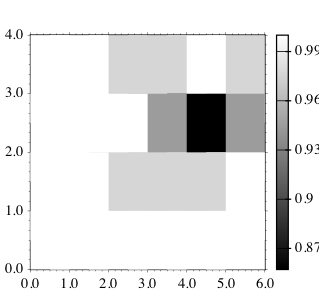

In [26]:
heatMapAxis' :: Axis Cairo V2 Double
heatMapAxis' = r2Axis &~ do
  display colourBar
  axisExtend Control.Lens..= noExtend
  axisColourMap Control.Lens..= greys
  --let result = [[1,1,3], [3,2,1],[1,2,2]]
  heatMap' $ reverse tryAgain

heatMapExample' = renderAxis heatMapAxis'
diagram heatMapExample'